In [120]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling as pdp
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [121]:
# LOAD DATA
INPUT_DIR  = '../../../input/m5-forecasting-accuracy/'
LOG_NAME = '06_21_14_56_46'
data = pd.read_csv(INPUT_DIR + "sales_train_evaluation.csv")
predicted = np.load(f"../log/{LOG_NAME}/pred_valid.npy")
json_load = json.load(open(f'../log/{LOG_NAME}/params.json', 'r'))

In [122]:
# InverseするためのScalerを作る
data = data.drop(['d_1062','d_1427','d_1792'],axis=1)
use_days = json_load['use_days']
train_x = np.array(data.iloc[:, -1 * (28 + use_days) : -28*2]).sum(axis=0).reshape(1,-1)
# train_x = np.array(data.iloc[:, -1 * (28*1 + use_days) : -28*1]).sum(axis=0).reshape(1,-1)
mm = MinMaxScaler(feature_range=(0.05, 0.95))
mm.fit(train_x.T)

MinMaxScaler(copy=True, feature_range=(0.05, 0.95))

In [123]:
# 予測値をInverse Transform
predicted = mm.inverse_transform(predicted)

In [124]:
days = 100
sells = np.array(data.iloc[:, -1 * days : -28]).sum(axis=0)
sells.reshape(1,-1).shape

(1, 72)

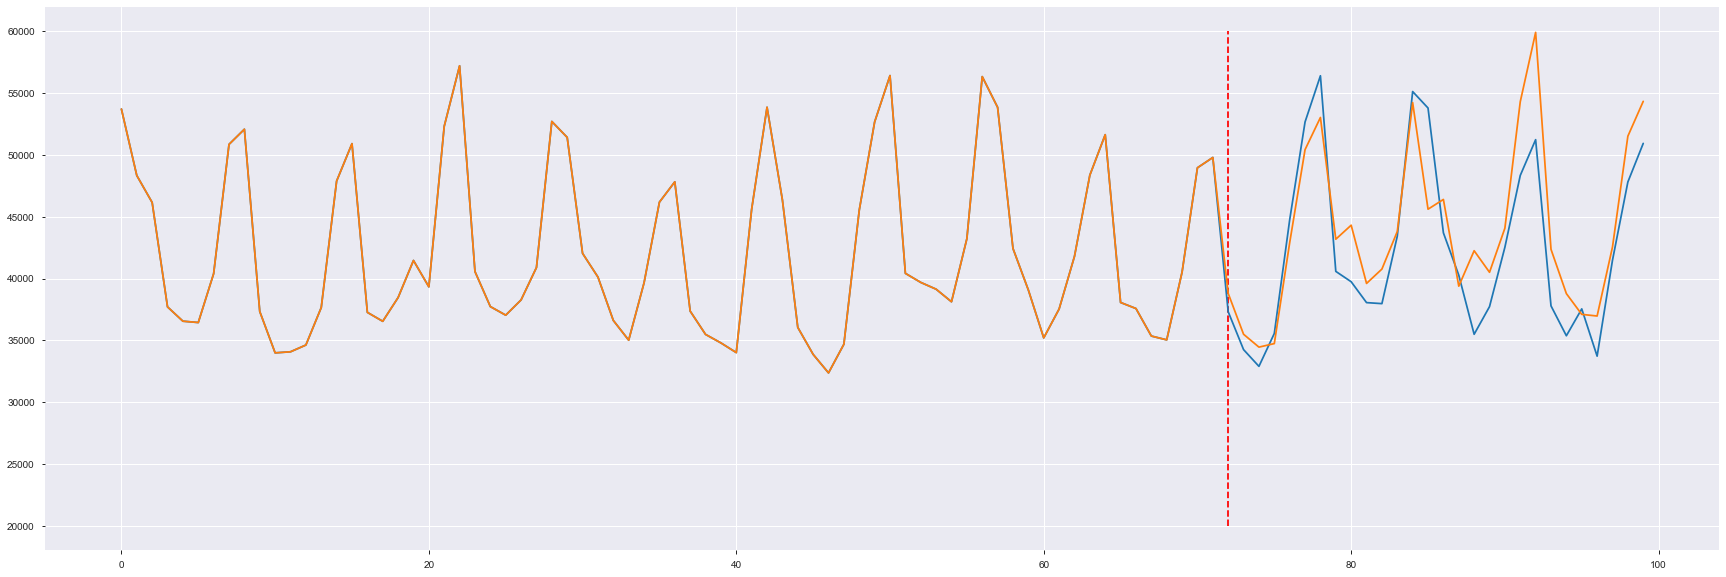

In [125]:
days = 100
f, ax = plt.subplots(figsize=(30, 10))
sells = np.array(data.iloc[:, -1 * days : -28]).sum(axis=0)
plt.plot(np.concatenate([sells.reshape(1,-1),predicted],axis=1).reshape(-1,))
plt.plot(np.array(data.iloc[:, -1 * days :]).sum(axis=0))
# sns.lineplot(predicted.iloc[i, :].index, predicted.iloc[i,:].values.astype("float32"))
plt.vlines(days-28, 20000, 60000, "red", linestyles='dashed')
plt.savefig(f"../log/{LOG_NAME}/pred.png")